# What is Sesonality
Repeating Trend/Pattern over time

#### Our Model Should Not Contain Sesonality

# We have To use `sesonal_decompose to check` Trend,Sesonality & Residual 

In [52]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import copy
from pylab import rcParams

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
df=pd.read_csv('Working1.csv', parse_dates=['Date'])

In [54]:
df

,Date,Values
0,2012-12-31,0.856250
1,2013-01-01,0.856250
2,2013-02-01,1.464582
3,2013-03-01,0.793751
4,2013-04-01,-0.112501
...,...,...
2466,2022-12-26,13.437507
2467,2022-12-27,11.325006
2468,2022-12-28,-3.481253
2469,2022-12-29,6.093747


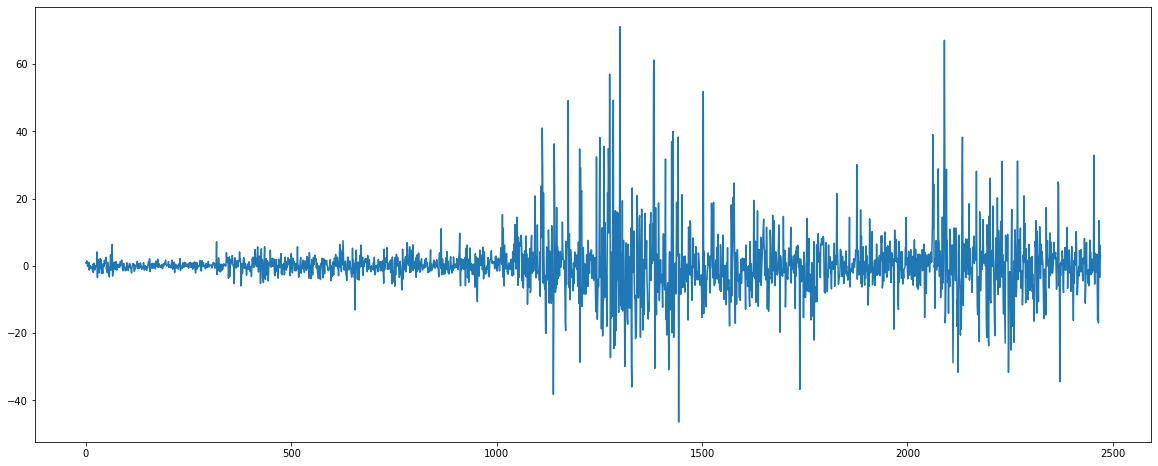

In [55]:
plt.figure(figsize=(20,8))
plt.plot(df['Values'])
plt.show()

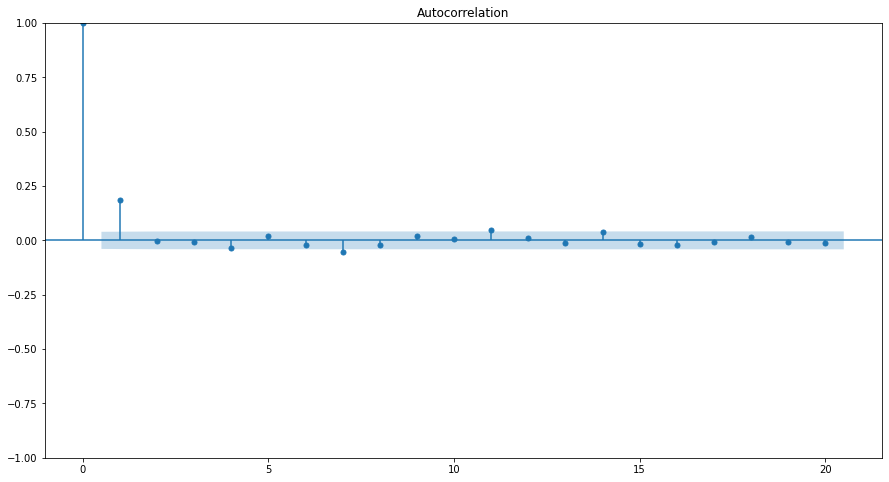

In [56]:
df2=pd.read_csv('Working1.csv',index_col=0,parse_dates=['Date'])

fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df2, lags=20,ax=ax)
plt.show()

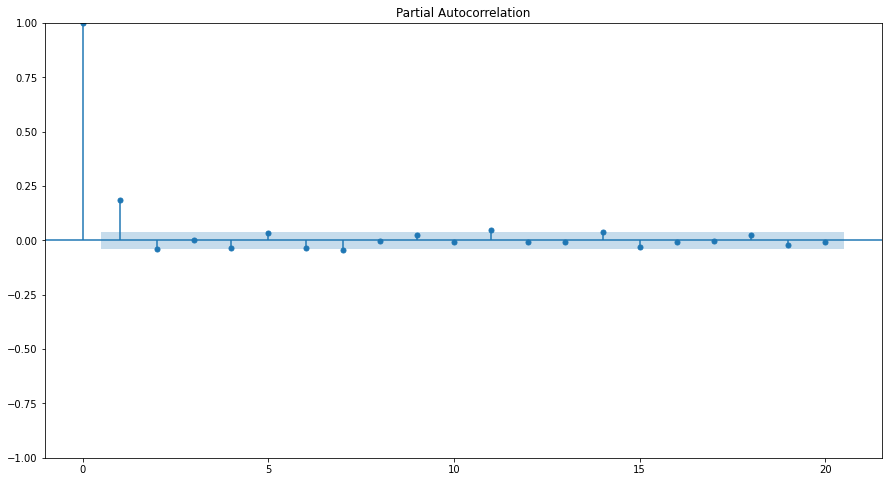

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_pacf(df2, lags=20,ax=ax)
plt.show()

The no of significant lines decreases in the middle of the series so we can use ar model

In [58]:
df2

,Values
Date,
2012-12-31,0.856250
2013-01-01,0.856250
2013-02-01,1.464582
2013-03-01,0.793751
2013-04-01,-0.112501
...,...
2022-12-26,13.437507
2022-12-27,11.325006
2022-12-28,-3.481253


In [61]:
df3=pd.read_csv('Working1.csv')
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.set_index(pd.date_range(start=df3['Date'].min(), end=df3['Date'].max(), freq='D'))

result = seasonal_decompose(df3, model='additive')

# Create a figure with multiple subplots for each component
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8))

# Plot each component on a separate subplot
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')

plt.show()

ValueError: Length mismatch: Expected 2471 rows, received array of length 3652

In [63]:
df3.shape

(2471, 2)